No score
No score


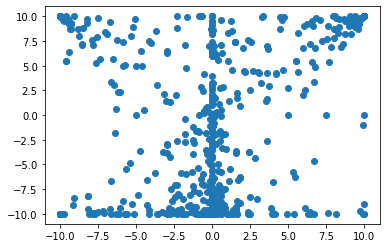

In [12]:
import praw
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import pprint
import operator
import re
import numpy as np

# Create Data Base of redditors with scores calculated by PolCompBot
masterList = pd.read_csv('masterList.csv',
                        header=0,
                        names=['name','libAuth','lefRit','quadrant'])

row = (masterList.shape[0])+1
# Create Reddit instance
reddit = praw.Reddit(client_id='a8fxlGxtt5HeRg', client_secret='x0oQ53axICf_azi5SY_yB5xVkE8', user_agent='Reddit Scrape')

# Create instance of redditor for PolCompBot
redditor = reddit.redditor('PolCompBot')

for redditor_comment in redditor.comments.new(limit=20):
    body = redditor_comment.body # Get comment body

    # Get lib/auth left/right score from comment body, cast to float
    libAuthScore = float(re.sub(r'\*\*','',re.findall(r'(\*\*[\d,.,-]+\*\*)', body)[0]))
    lefRitScore = float(re.sub(r'\*\*','',re.findall(r'(\*\*[\d,.,-]+\*\*)', body)[1]))
    
    # check if both scores are 0
    if libAuthScore == 0 and lefRitScore == 0:
        print("No score")
        
    # else get user and quadrant
    else:
        user = re.search(r'/u/[^\s]+', body).group()
        quadrant = re.sub(r'\*\*','',re.search(r'(\*\*[\w]+\*\*)', body).group())
        tempDF = ({ "name":     user,
                    "libAuth":  [libAuthScore],
                    "lefRit":   [lefRitScore],
                    "quadrant": quadrant})
        if not (masterList['name'].str.contains(user).any()):
            masterList.loc[row] = tempDF
            row += 1

x = np.array(masterList['libAuth'].str.replace(r'[\[\]]','').astype(float))
y = np.array(masterList['lefRit'].str.replace(r'[\[\]]','').astype(float))

# plot = masterList.plot.scatter(x='libAuth', y='lefRit')

plt.scatter(x,y)

plt.show()

masterList.to_csv("masterList.csv")